# Classification

## MNIST

In [1]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# # run this cell to import the MNIST dataset. It takes a few minutes.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() # extra code – we only use data and target in this notebook






dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
import pandas as pd
import numpy as np

# # The MNIST dataset was downloaded from OpenML.org. X is the data, y is the target.
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)



(70000, 784)
(70000,)


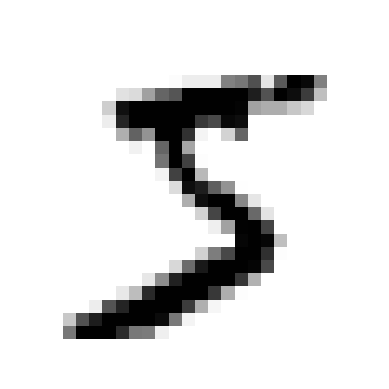

5


In [26]:
index=0
some_digit = X.iloc[index]  
some_digit_image = np.array(some_digit).reshape(28, 28) # reshape it to plot it

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print(y[index])

In [28]:
y=y.astype(np.uint8)

# split the data into train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # 60,000 for training, 10,000 for testing
print(X_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


## Train a binary classifier

In [29]:
# # Training a Binary Classifier
# # Let's simplify the problem for now and only try to identify one digit – for example, the number 5. This "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let's create the target vectors for this classification task:

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)


In [30]:

# # Stochastic Gradient Descent (SGD) classifier
# This classifier has the advantage of being capable of handling very large datasets efficiently.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # create the classifier object with a random state of 42
sgd_clf.fit(X_train, y_train_5) # train the classifier on the training set of 5s and not-5s


SGDClassifier(random_state=42)

In [31]:
# VAlidate the model on original digit
sgd_clf.predict([some_digit])

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

In [33]:
# # Performance Measures

# ## Measuring Accuracy Using Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy") # 3-fold cross-validation on the training set using the sgd_clf model trained above

#output is an array of accuracy scores, one for each fold

array([0.95035, 0.96035, 0.9604 ])

In [42]:
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="f1")

array([0.63126625, 0.74460548, 0.79375   ])

In [38]:
from sklearn import metrics

metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [41]:
# Never5Classifier
# Let's look at a very dumb classifier that just classifies every single image in the "not-5" class:

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass # do nothing
    def predict(self, X): # always predict that the digit is not 5
        return np.zeros((len(X), 1), dtype=bool) # return an array of False values
    

never_5_clf = Never5Classifier() # create an instance of the class
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 3-fold cross-validation on the training set using the never-5 classifier



array([0.91125, 0.90855, 0.90915])

In [43]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="f1") # 3-fold cross-validation on the training set using the never-5 classifier

array([0., 0., 0.])

## Confusion matrix

In [44]:
# ## Confusion Matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # return the prediction on if each number is a 5 made on each test fold (i.e., the predictions made on each instance when it was in the test set)
y_train_pred.shape

(60000,)

In [45]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
# The first row of this matrix considers non-5 images (the negative class): 53,272 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly classified as 5s (false positives).


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [46]:
# assume that we have a perfect classifier, that makes no mistakes
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [47]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 687),
recall_score(y_train_5, y_train_pred) # == 3530 / (3530 + 1891)

0.8370879772350012


0.6511713705958311

In [48]:

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

## Precision/Recall Trade-off

In [50]:

# ## Precision/Recall Tradeoff

y_scores = sgd_clf.decision_function([some_digit]) # return the confidence score for each instance.  Measure of how much the classifier believes that the instance is positive (5 in this case)
y_scores


c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [51]:
# Let's raise the threshold:

threshold = 8000
y_some_digit_pred = (y_scores > threshold) 
y_some_digit_pred 

array([False])

In [52]:
# # How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:


y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                method="decision_function")


In [58]:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


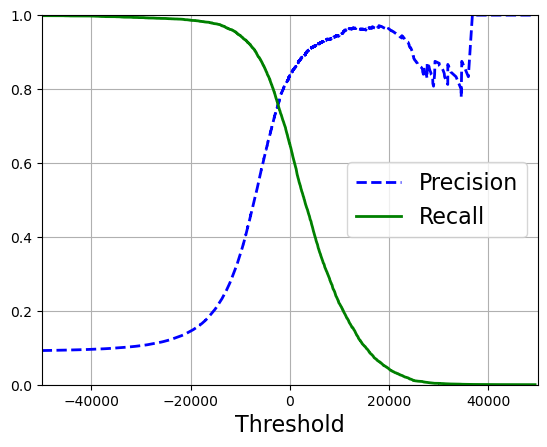

<Figure size 800x400 with 0 Axes>

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # plot precision as a function of the threshold
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # plot recall as a function of the threshold
    plt.legend(loc="center right", fontsize=16) # add a legend
    plt.xlabel("Threshold", fontsize=16)        # add x label
    plt.grid(True)                              # add grid
    plt.axis([-50000, 50000, 0, 1])             # set axis limits
    plt.figure(figsize=(8, 4))                      # set figure size

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


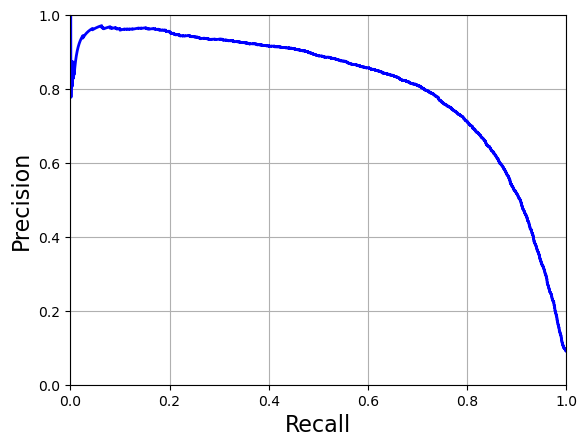

<Figure size 800x600 with 0 Axes>

In [60]:
# Another way to select a good precision/recall tradeoff is to plot precision directly against recall, as shown in the following code:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2) # plot precision as a function of recall
    plt.xlabel("Recall", fontsize=16)               # add x label
    plt.ylabel("Precision", fontsize=16)            # add y label
    plt.axis([0, 1, 0, 1])                          # set axis limits
    plt.grid(True)                                  # add grid
    plt.figure(figsize=(8, 6))                      # set figure size

plot_precision_vs_recall(precisions, recalls)

In [61]:
# You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop—for example, at around 60% recall. But of course the choice depends on your project.

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # find the lowest threshold that gives you at least 90% precision
threshold_90_precision


3370.019499143957

In [62]:
# To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:

y_train_pred_90 = (y_scores >= threshold_90_precision) # return an array of True/False values
y_train_pred_90


array([False, False, False, ...,  True, False, False])

In [65]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90)) 
f1_score(y_train_5, y_train_pred_90)

0.9000345901072293
0.4799852425751706


0.626082771896054

## ROC Curve

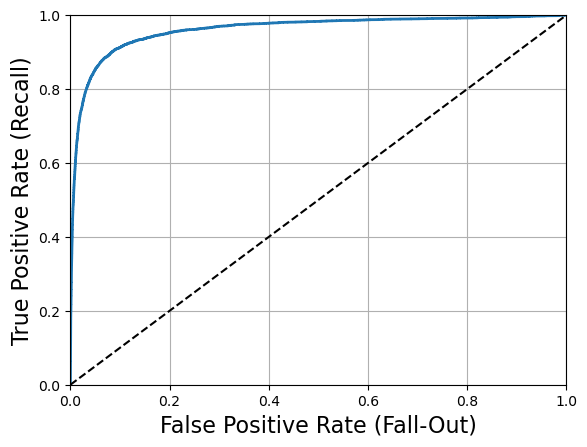

<Figure size 800x600 with 0 Axes>

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # compute the TPR and FPR for various threshold values

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label) # plot the FPR against the TPR
    plt.plot([0, 1], [0, 1], 'k--') # plot the dashed diagonal
    plt.axis([0, 1, 0, 1]) # set axis limits
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # add x label
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) # add y label
    plt.grid(True) # add grid
    plt.figure(figsize=(8, 6)) # set figure size

plot_roc_curve(fpr, tpr)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores) # compute the area under the curve (AUC)

0.9604938554008616